<a href="https://colab.research.google.com/github/allandevbr92/MyResume/blob/master/varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


## Carregando os Dados

In [190]:
# Carrega o dataset


df = pd.read_csv('/content/drive/MyDrive/varejo/dataset.csv', encoding='ISO-8859-1', delimiter=',', parse_dates=['Data_Pedido'], dayfirst=True)


In [183]:
# Shape


df.shape

(9700, 11)

In [184]:
# Amostra dos dados

df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Análise Exploratória

In [185]:
# Colunas do conjunto de dados

df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [186]:
# Verificando o tipo de dado de cada coluna

df.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [14]:
# Resumo estatístico da coluna com o valor de venda

df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [16]:
# Verificando se há registros duplicados

df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [17]:
# Verificando de há valores ausentes

df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [56]:
# Primeiro filtramos o dataframe com os registros da categoria que desejamos
df_p1 = df[df['Categoria'] == 'Office Supplies']

# Em seguida agrupamos por cidade e calculamos o total de valor_venda
df_p1_total = df_p1.groupby('Cidade')['Valor_Venda'].sum()

# Então encontramos a cidade com maior valor de venda
cidade_maior_venda = df_p1_total.idxmax()
print("Cidade com maior valor de venda para 'Office Supplies':", cidade_maior_venda)

# Para conferir o resultado
df_p1_total.sort_values(ascending = False)

Cidade com maior valor de venda para 'Office Supplies': New York City


Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

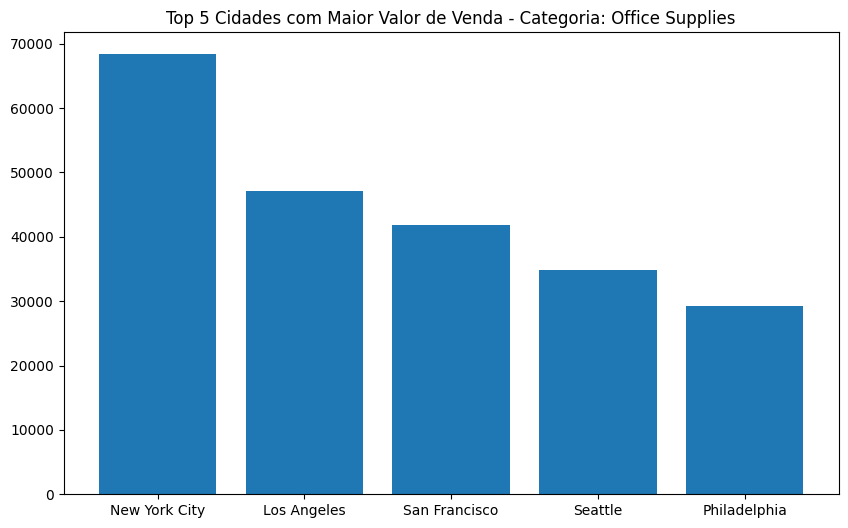

In [26]:
# Pergunta de Negócio 1: Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?
categoria = 'Office Supplies'
df_office_supplies = df[df['Categoria'] == categoria]
df_agrupado = df_office_supplies.groupby('Cidade')['Valor_Venda'].sum().reset_index()
df_top_cidades = df_agrupado.nlargest(5, 'Valor_Venda')  # Selecionar apenas o top 5 de cidades com maiores valores de venda
df_top_cidades = df_top_cidades.sort_values('Valor_Venda', ascending=False)  # Ordenar do maior para o menor

# Visualização: Gráfico de barras verticais para o top 5
plt.figure(figsize=(10, 6))
plt.bar(df_top_cidades['Cidade'], df_top_cidades['Valor_Venda'])
plt.xlabel('')
plt.ylabel('')
plt.title('Top 5 Cidades com Maior Valor de Venda - Categoria: Office Supplies')
plt.xticks(rotation=0)
plt.show()


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?



In [60]:
# Calculamos o total de vendas para cada data de pedido
df_p2 = df.groupby('Data_Pedido')['Valor_Venda'].sum()

In [66]:
df_p2.head()

Data_Pedido
2015-01-03      16.448
2015-01-04     288.060
2015-01-05      19.536
2015-01-06    4407.100
2015-01-07      87.158
Name: Valor_Venda, dtype: float64

Obs: Estamos aqui tratando data de pedido como variável categórica e não como série temporal. Se a pergunta fosse "ao longo do tempo" essa resposta não seria a ideal.

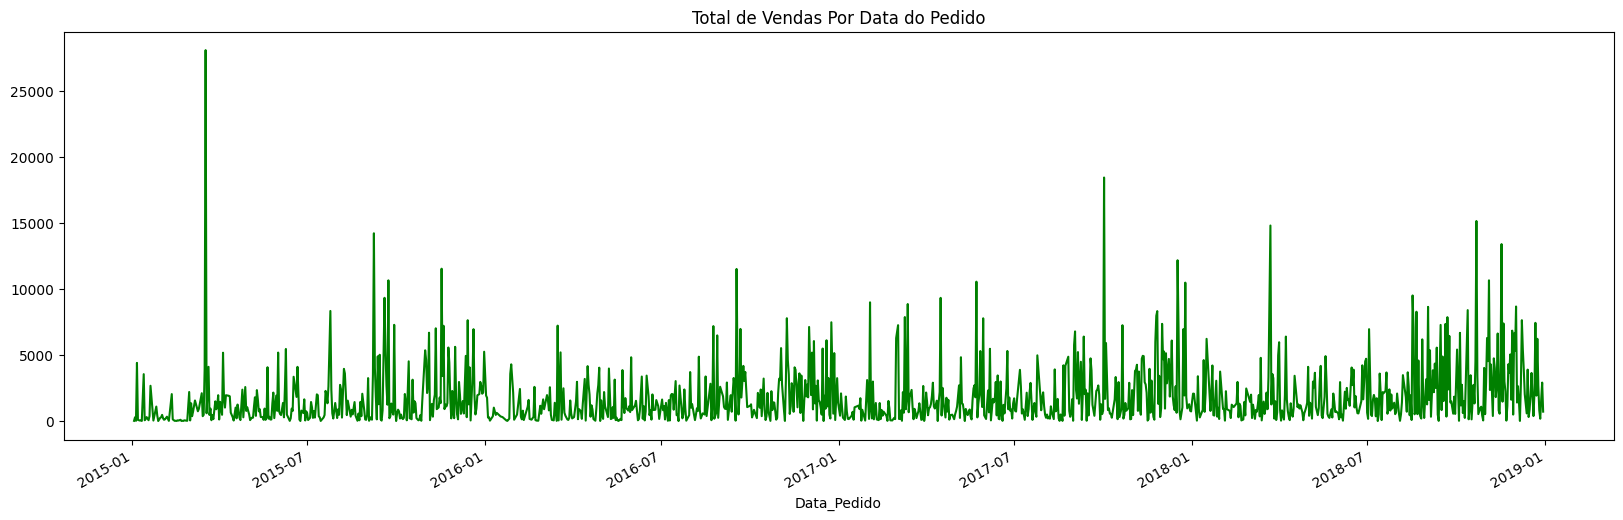

In [68]:
# Plot
plt.figure(figsize = (20, 6))
df_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?



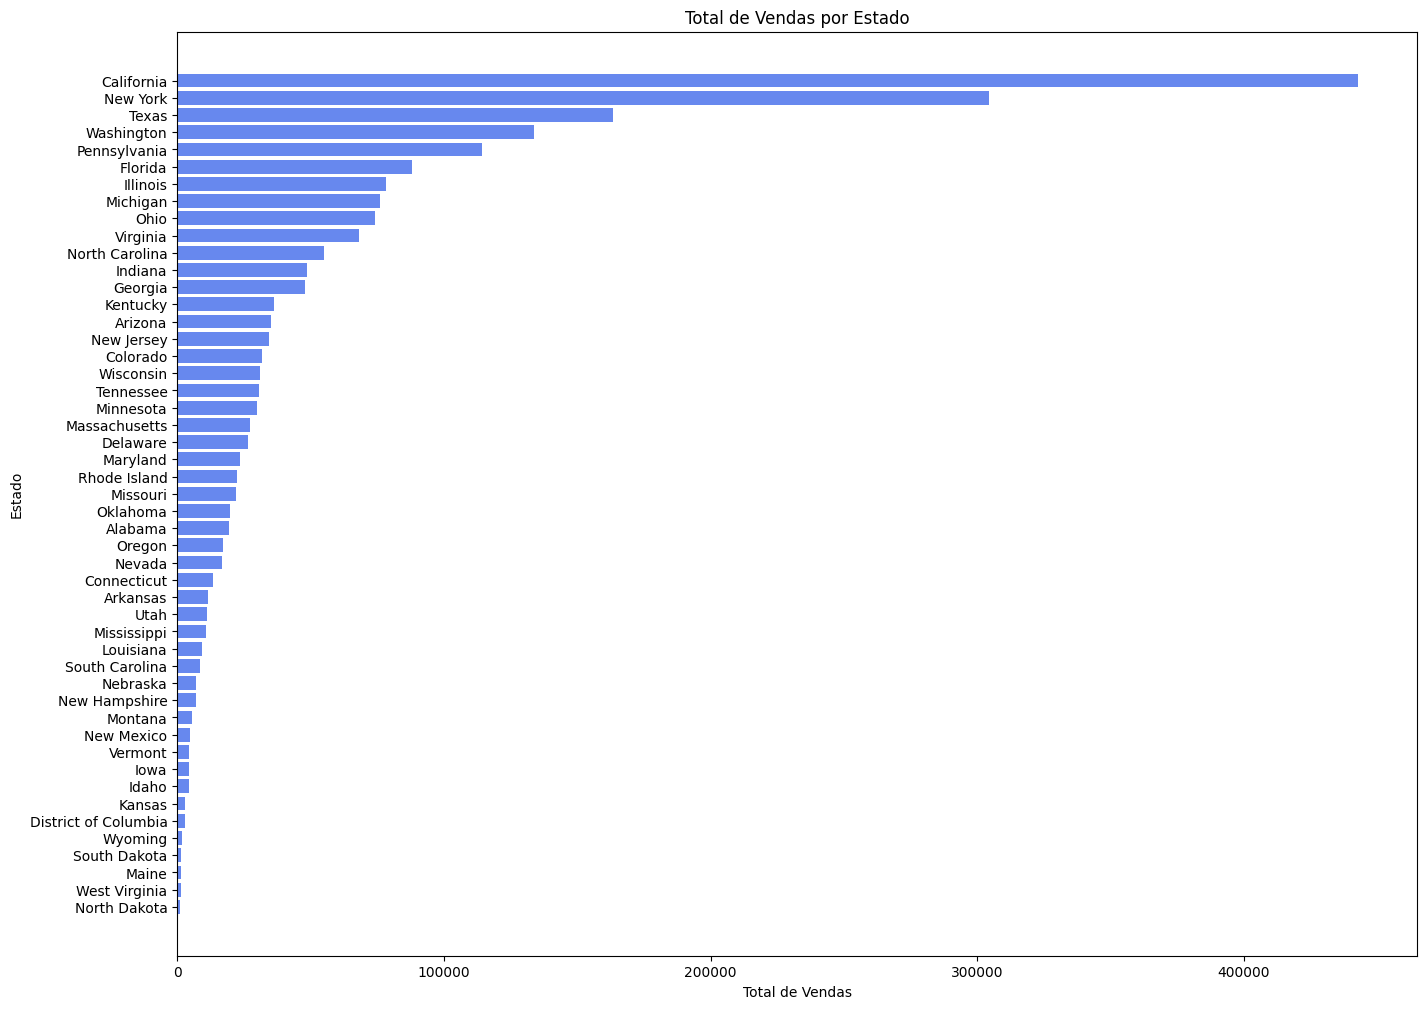

In [142]:
# Calcular o total de vendas por estado
total_vendas_estado = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

# Ordenar os dados por valor de vendas de forma decrescente
total_vendas_estado = total_vendas_estado.sort_values('Valor_Venda', ascending=True)

# Visualização: Gráfico de barras horizontais
plt.figure(figsize=(16, 12))
plt.barh(total_vendas_estado['Estado'], total_vendas_estado['Valor_Venda'])
plt.xlabel('Total de Vendas')
plt.ylabel('Estado')
plt.title('Total de Vendas por Estado')
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

In [76]:
# Agrupamos por cidade, calculamos o total de vendas e ordenamos listando somente os 10 primeiros registros

df_p4 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                    ascending = False).head(10)


In [77]:
df_p4.head(10)


,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


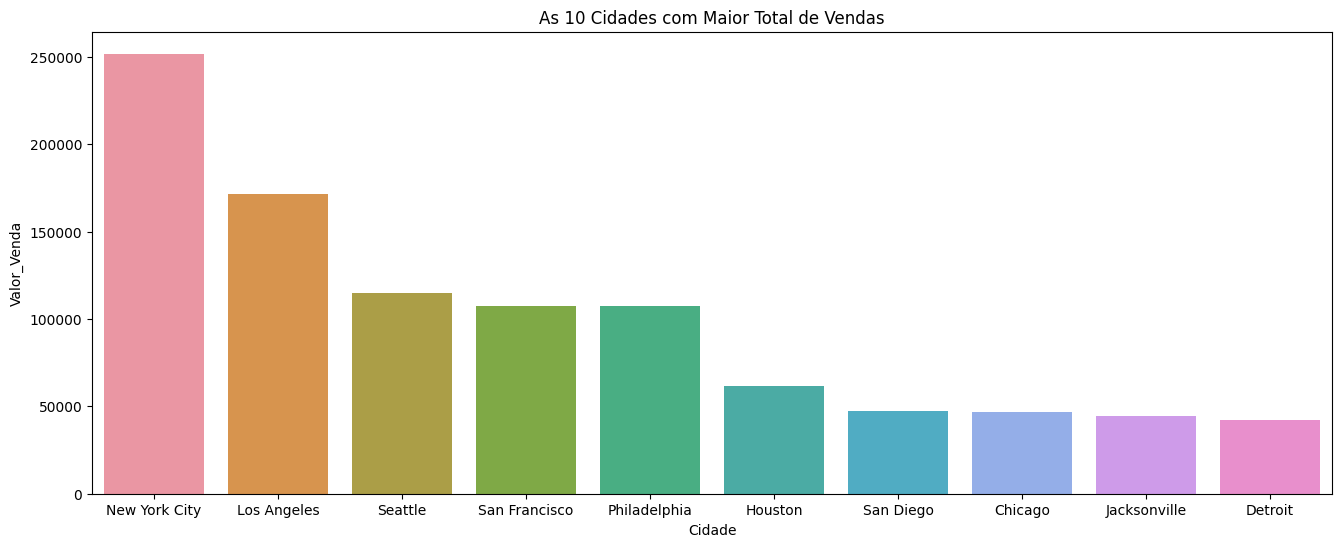

In [82]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_p4,
            y = 'Valor_Venda',
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?



In [95]:
# Agrupamos por segmento e calculamos o total de vendas
df_p5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                      ascending = False)

In [97]:
df_p5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [98]:
# Função para converter os dados em valor absoluto
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

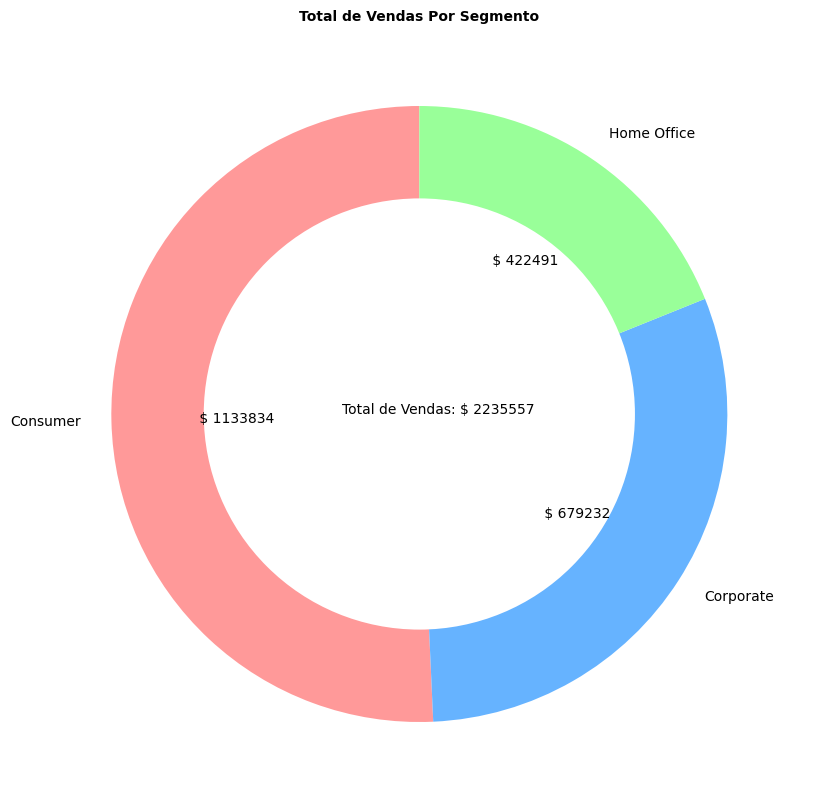

In [109]:
# Cores personalizadas
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Tamanho da figura
plt.figure(figsize=(14, 10))

# Gráfico de pizza
plt.pie(df_p5['Valor_Venda'],
        labels=df_p5['Segmento'],
        colors=colors,
        autopct=autopct_format(df_p5['Valor_Venda']),
        startangle=90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text='Total de Vendas: ' + '$ ' + str(int(sum(df_p5['Valor_Venda']))), xy=(-0.25, 0), fontsize=10)
plt.title('Total de Vendas Por Segmento', fontsize=10, fontweight='bold')

# Exibir o gráfico
plt.show()


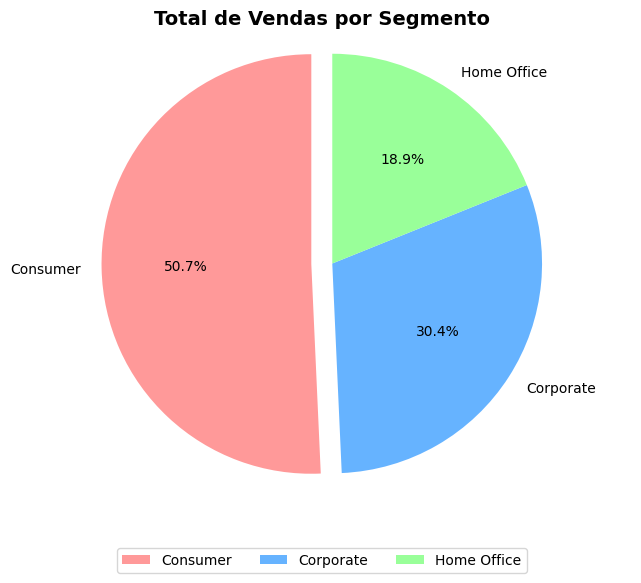

In [89]:
# Calcular o total de vendas por segmento
total_vendas_segmento = df.groupby('Segmento')['Valor_Venda'].sum().reset_index()

# Identificar o segmento com o maior total de vendas
segmento_maior_vendas = total_vendas_segmento.loc[total_vendas_segmento['Valor_Venda'].idxmax(), 'Segmento']

# Configurações do gráfico de pizza
plt.figure(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Definir cores personalizadas
explode = (0.1, 0, 0)  # Destacar a primeira fatia

# Criar o gráfico de pizza
plt.pie(total_vendas_segmento['Valor_Venda'], labels=total_vendas_segmento['Segmento'],
        colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

# Configurações adicionais
plt.title('Total de Vendas por Segmento', fontsize=14, fontweight='bold')
plt.axis('equal')  # Tornar o gráfico circular

# Posicionar a legenda abaixo do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Exibir o gráfico
plt.show()

## Pergunta de Negócio 6:

### Qual o Total de Vendas Por Segmento e Por Ano?

In [117]:
# Convertemos a coluna de data para o tipo datetime para obter o formato adequado
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst = True)

In [120]:
df.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [122]:
# Extraímos o ano criando nova variável
df['Ano'] = df['Data_Pedido'].dt.year

In [124]:
# Total de vendas por segmento e por ano
df_p6 = df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

In [126]:
df_p6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

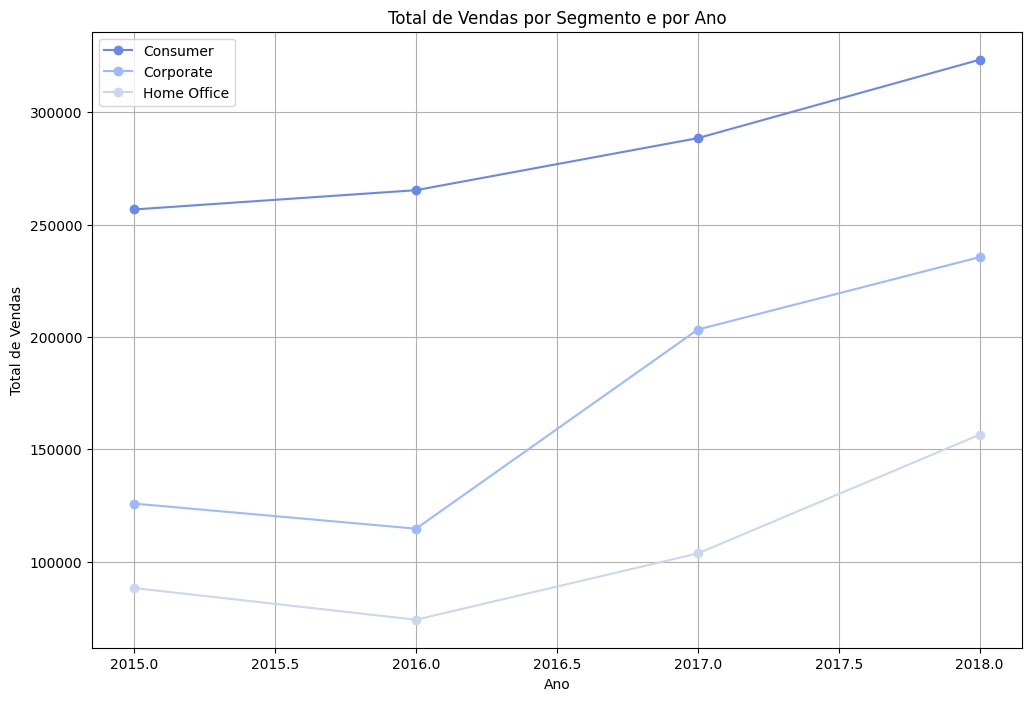

In [127]:
# Agrupar por segmento e ano, e calcular o total de vendas
total_vendas_segmento_ano = df.groupby(['Segmento', df['Data_Pedido'].dt.year])['Valor_Venda'].sum().reset_index()

# Configurações do gráfico
plt.figure(figsize=(12, 8))

# Loop pelos segmentos para criar os gráficos de linha separados
for segmento in total_vendas_segmento_ano['Segmento'].unique():
    segmento_data = total_vendas_segmento_ano[total_vendas_segmento_ano['Segmento'] == segmento]
    plt.plot(segmento_data['Data_Pedido'], segmento_data['Valor_Venda'], marker='o', label=segmento)

# Configurações adicionais
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Segmento e por Ano')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


## Pergunta de Negócio 7:

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

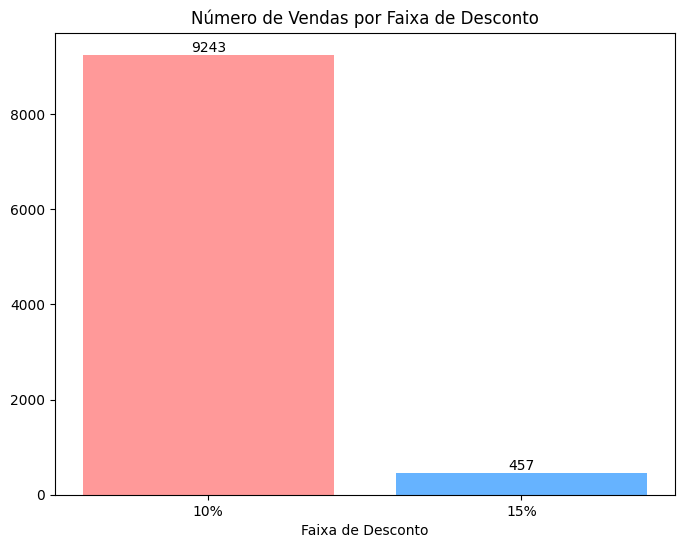

In [141]:
# Criar os dados para o gráfico
descontos = ['10%', '15%']
num_vendas = [num_vendas_desconto_10, num_vendas_desconto_15]

# Configurar o gráfico de barras verticais
plt.figure(figsize=(8, 6))
plt.bar(descontos, num_vendas, color=['#ff9999', '#66b3ff'])
plt.xlabel('Faixa de Desconto')
plt.ylabel('')
plt.title('Número de Vendas por Faixa de Desconto')

# Adicionar rótulos nas barras
for i, v in enumerate(num_vendas):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


## Pergunta de Negócio 8:
### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

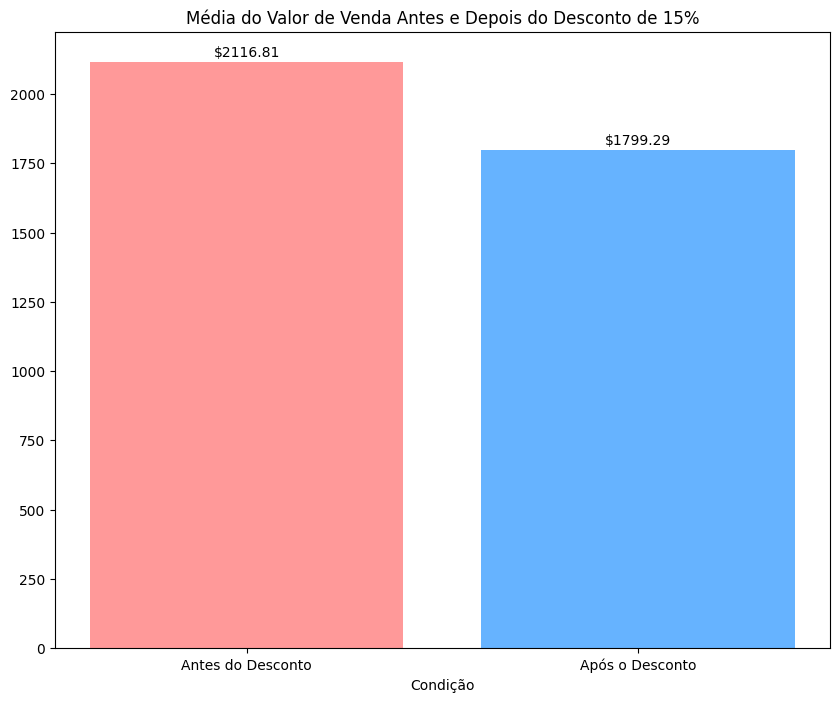

In [159]:
# Dados para o gráfico
valores = [media_valor_venda_antes, media_valor_venda_depois]
labels = ['Antes do Desconto', 'Após o Desconto']
colors = ['#ff9999', '#66b3ff']

# Configurações do gráfico de barras verticais
plt.figure(figsize=(10, 8))
plt.bar(labels, valores, color=colors)
plt.xlabel('Condição')
plt.ylabel('')
plt.title('Média do Valor de Venda Antes e Depois do Desconto de 15%')

# Exibir os valores acima das barras
for i, v in enumerate(valores):
    plt.text(i, v + 20, f'${v:.2f}', ha='center')

# Exibir o gráfico
plt.show()

## Pergunta de Negócio 9:
### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?



In [198]:
# Extraímos o mês e gravamos em uma nova variável
df['Mes'] = df['Data_Pedido'].dt.month
# Extraímos o mês e gravamos em uma nova variável
df['Ano'] = df['Data_Pedido'].dt.year

In [201]:
# Agrupamos por ano, mês e segmento e calculamos estatísticas de agregação
df_p9 = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])

In [202]:
df_p9

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [204]:
# Vamos extrair os níveis
anos = df_p9.index.get_level_values(0)
meses = df_p9.index.get_level_values(1)
segmentos = df_p9.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

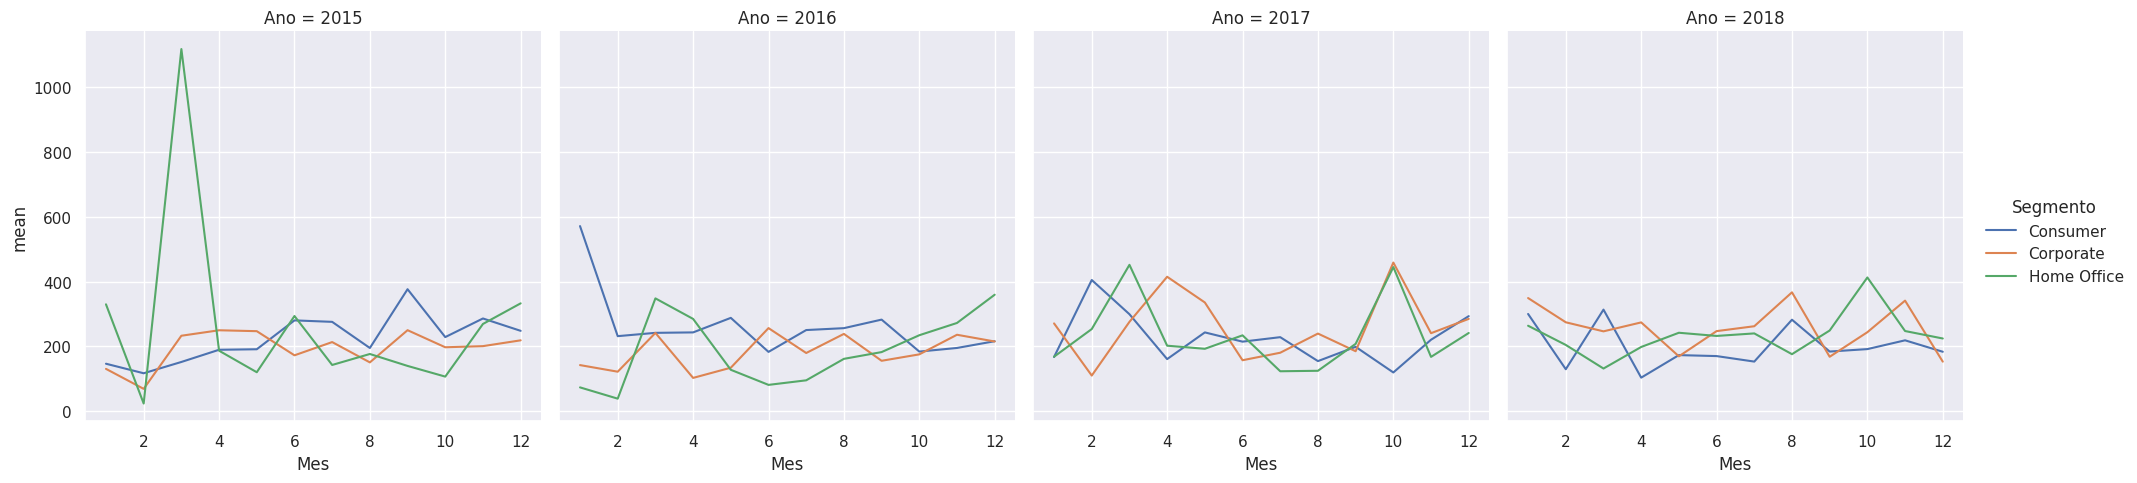

In [206]:
# Plot
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_p9,
                   y = 'mean',
                   x = meses,
                   hue = segmentos,
                   col = anos,
                   col_wrap = 4)
plt.show()

## Pergunta de Negócio 10:
### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?